In [67]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [68]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
  nunique = df.nunique()
  df = df[[col for col in df if nunique[col] > 1 and nunique [col] < 50]]
  nRow, nCol = df.shape
  columnNames = list(df)
  # Calculate nGraphRow before using it in the calculation
  nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow  # Use // for integer division to ensure an integer result
  plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
  for i in range(min(nCol, nGraphShown)):
    plt.subplot(nGraphRow, nGraphPerRow, i + 1)
    columnDf = df.iloc[:, i]
    if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
      valueCounts = columnDf.value_counts()
      valueCounts.plot.bar()
    else:
      columnDf.hist()
    plt.ylabel('counts')
    plt.xticks(rotation = 90)
    plt.title(f'{columnNames[i]} (column {i})')
  plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
  plt.show()

In [69]:
def plotCorrelationMatrix(df, graphWidth):
  filename = df.dataframeName
  # Drop columns with any NaN values
  # df = df.dropna(axis='columns')  # Commented out to potentially improve the result

  # Drop rows with missing values in any column
  # Drop rows with missing values in any column
  df = df.dropna()

  # Select only numeric columns
  df = df.select_dtypes(include=[np.number])

  df = df[[col for col in df if df[col].nunique() > 1]]
  if df.shape[1] < 2:
    print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
    return
  corr = df.corr()
  plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
  corrMat = plt.matshow(corr, fignum=2)
  plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
  plt.yticks(range(len(corr.columns)), corr.columns)
  plt.gca().xaxis.tick_bottom()
  plt.colorbar(corrMat)
  plt.title(f'Correlation Matrix for {filename}', fontsize=15)
  plt.show()

In [70]:
def plotScatterMatrix(df, plotSize, textSize):
  df = df.select_dtypes(include=[np.number])
  df = df.dropna(axis='columns')  # Changed 'columns' to axis='columns'
  df = df[[col for col in df if df[col].nunique() > 1]]
  columnNames = list(df)
  if len(columnNames) > 10:
    columnsNames = columnNames[:10]
  df = df[columnNames]
  ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal="kde")
  # Calculate the correlation matrix directly
  corrs = df.corr()
  for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
    # Access correlation values using .iloc
    ax[i, j].annotate('Corr. coef = %.3f' % corrs.iloc[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [71]:
nRowsRead = 1000
df1 = pd.read_csv('/content/air_traffic_data.csv', delimiter=',', nrows= nRowsRead)
df1.dataframeName = 'air_traffic_data.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 16 columns


In [72]:

df1.head(5)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


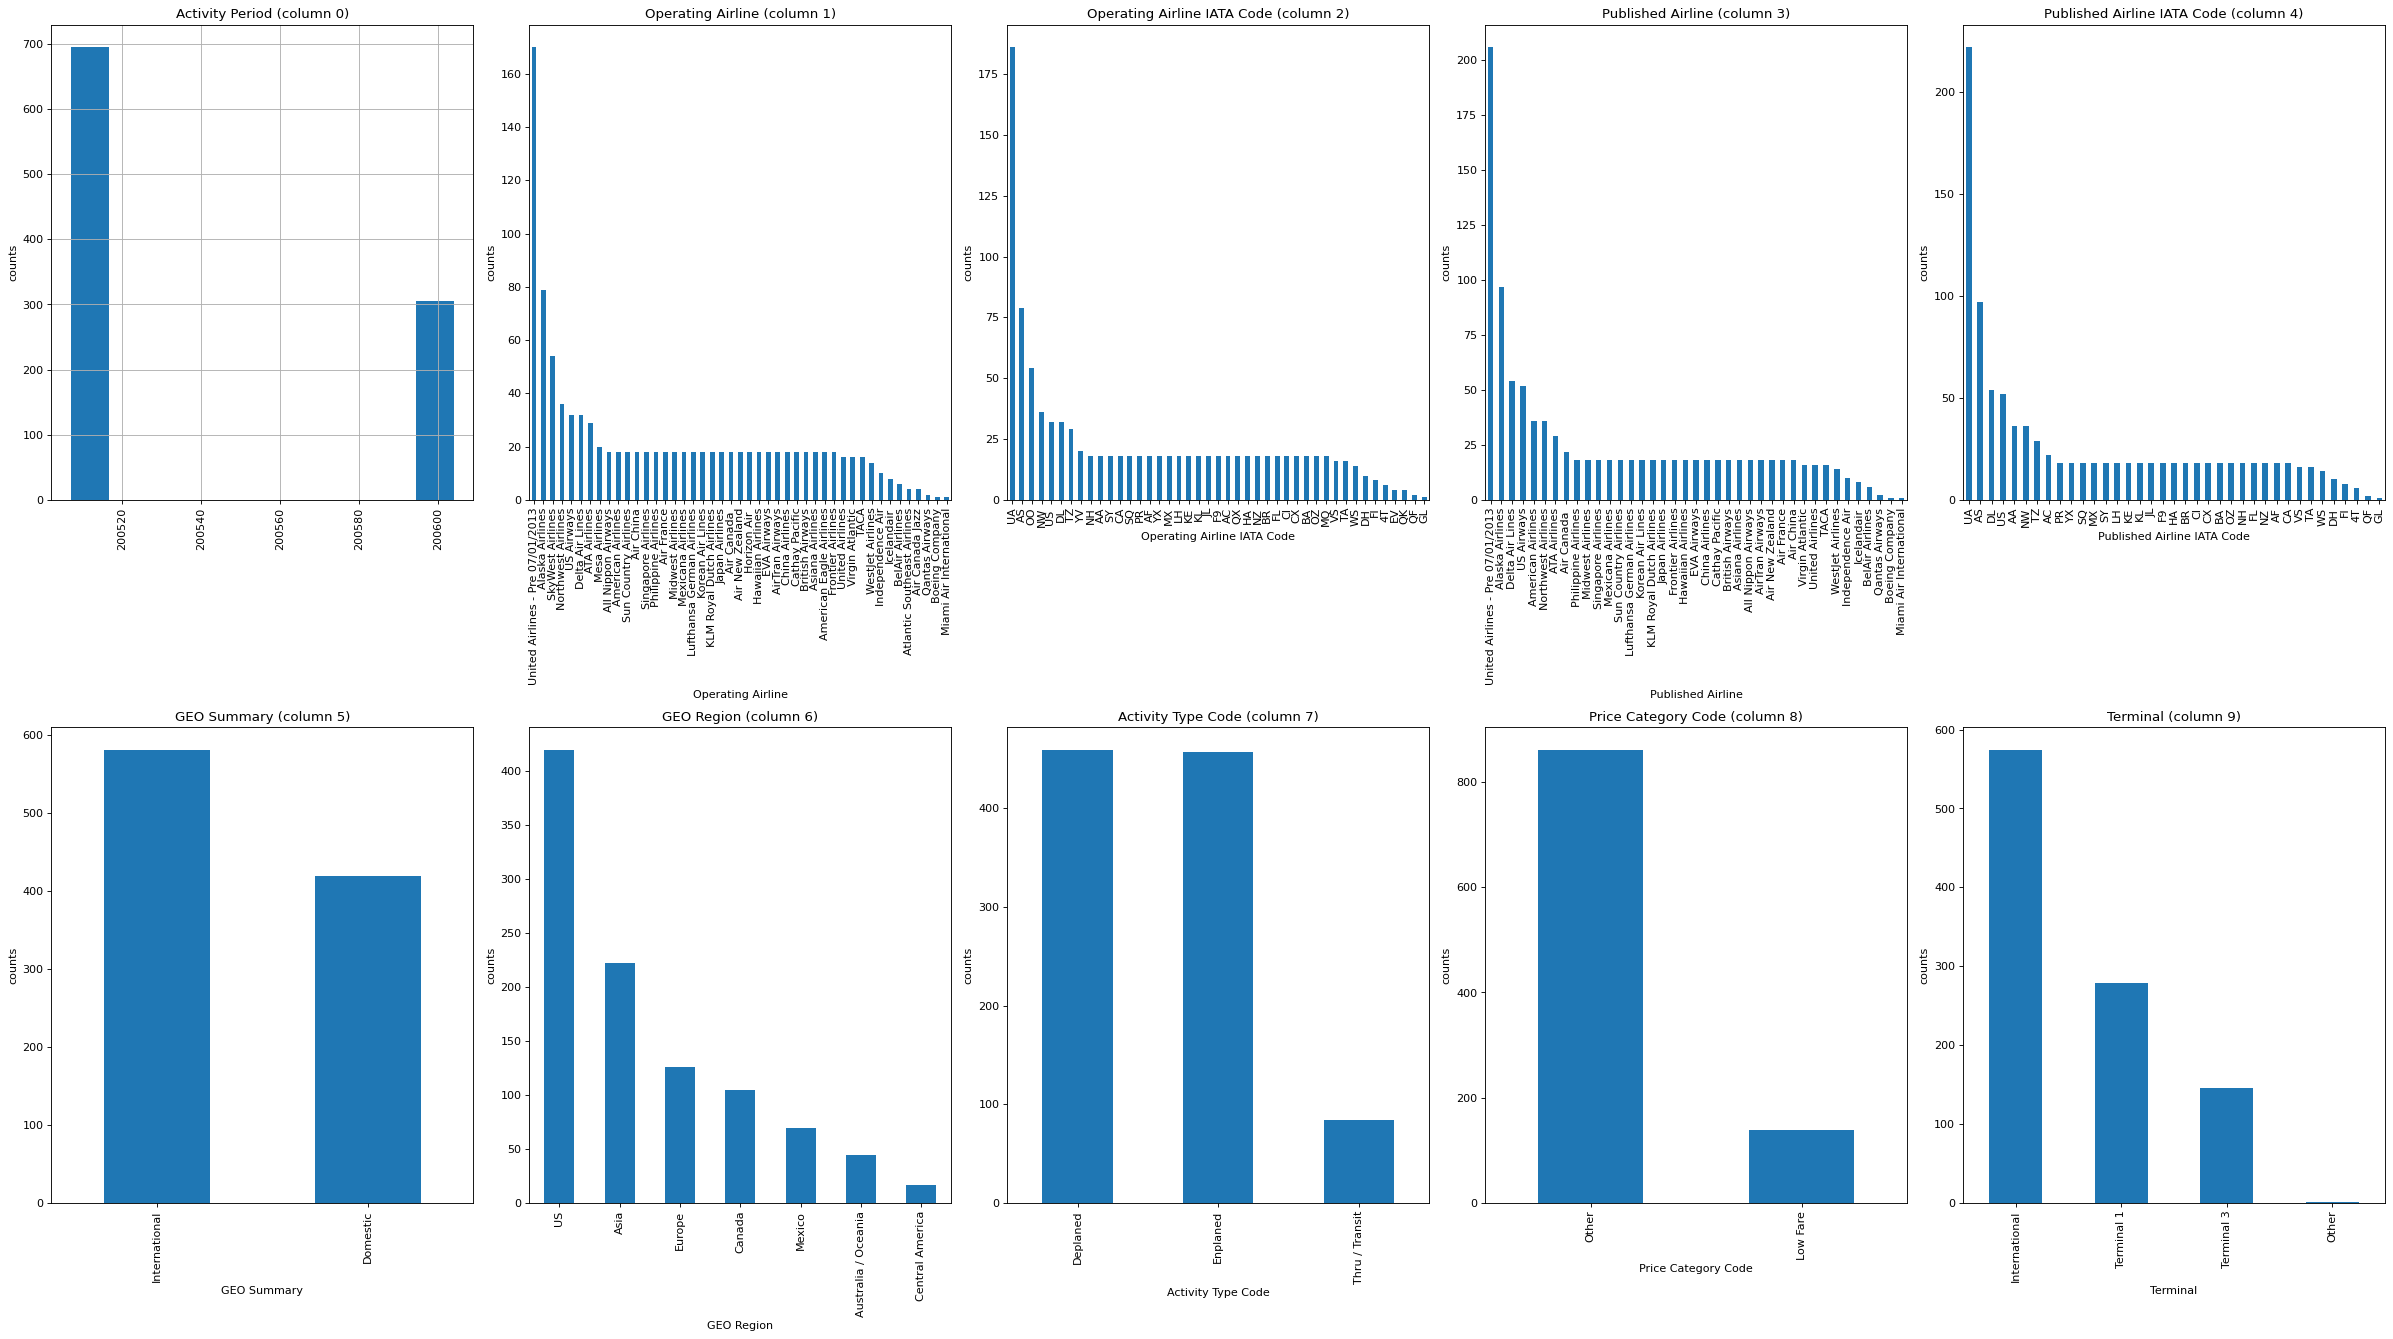

In [73]:
plotPerColumnDistribution(df1, 10, 5)

<Figure size 640x640 with 0 Axes>

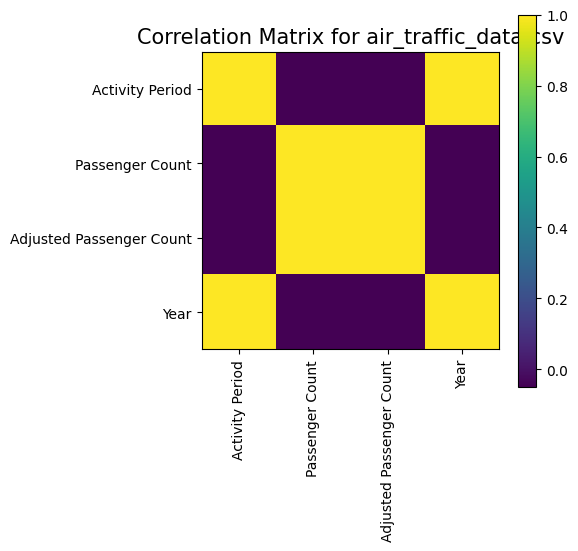

In [74]:
plotCorrelationMatrix(df1, 8)

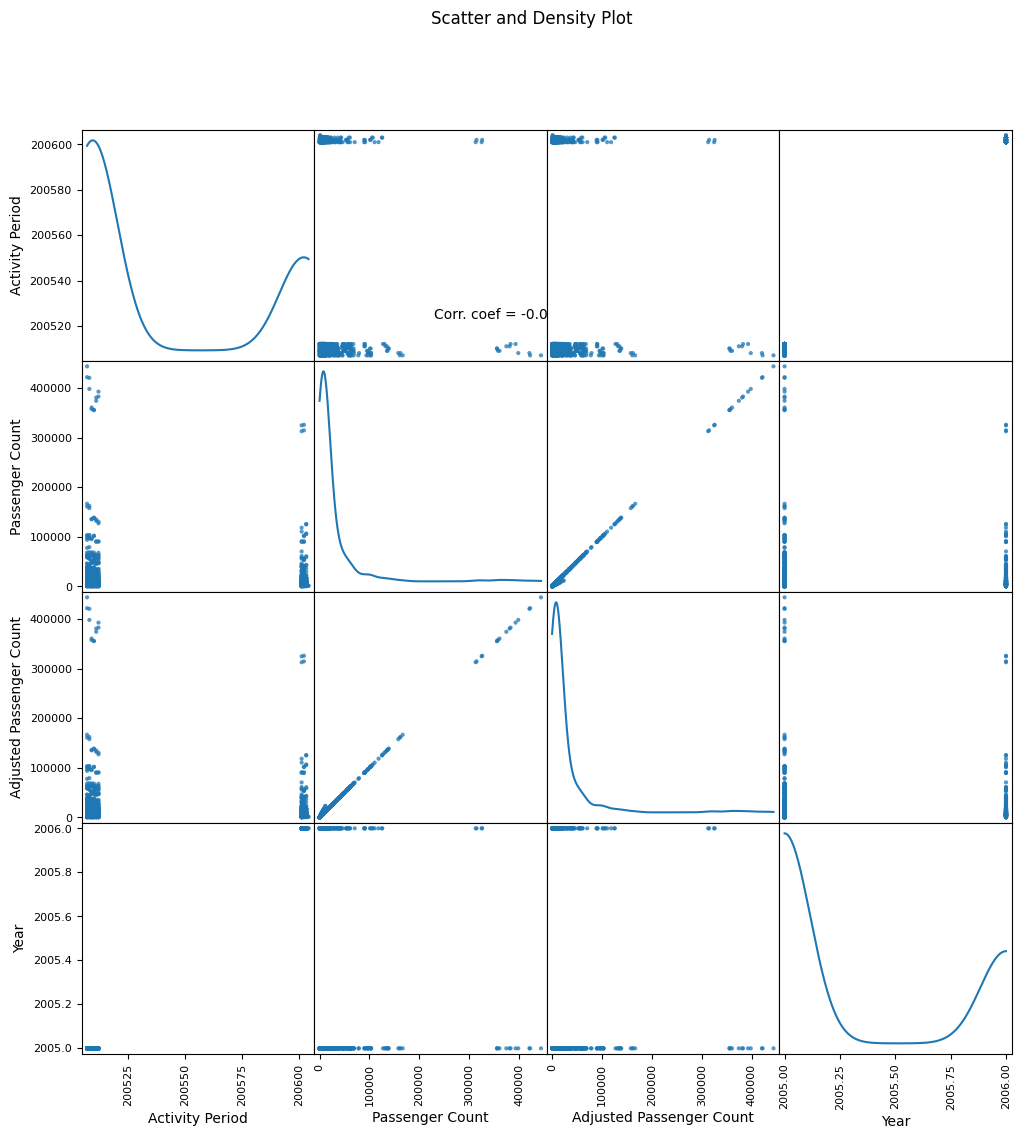

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [75]:
plotScatterMatrix(df1, 12, 10)